# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../heart_raw/heart.csv")
df.head()

Mounted at /content/drive


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


/tmp/ipython-input-1493915730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-1493915730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-1493915730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-1493915730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

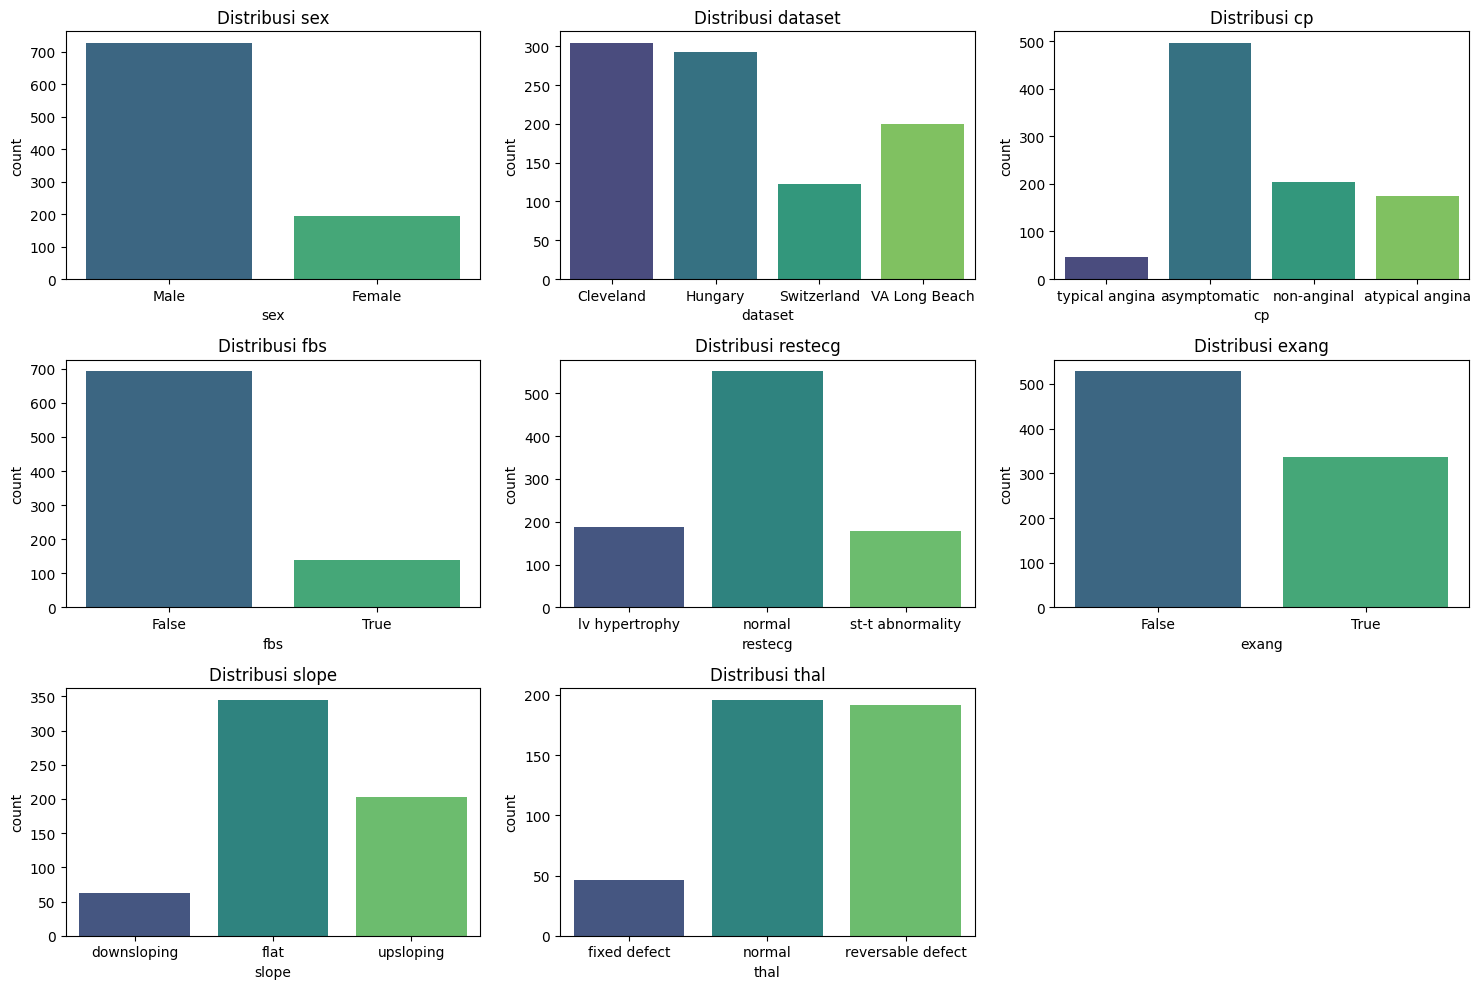

In [11]:
cat_cols = df.select_dtypes(include=["object"]).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(col)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

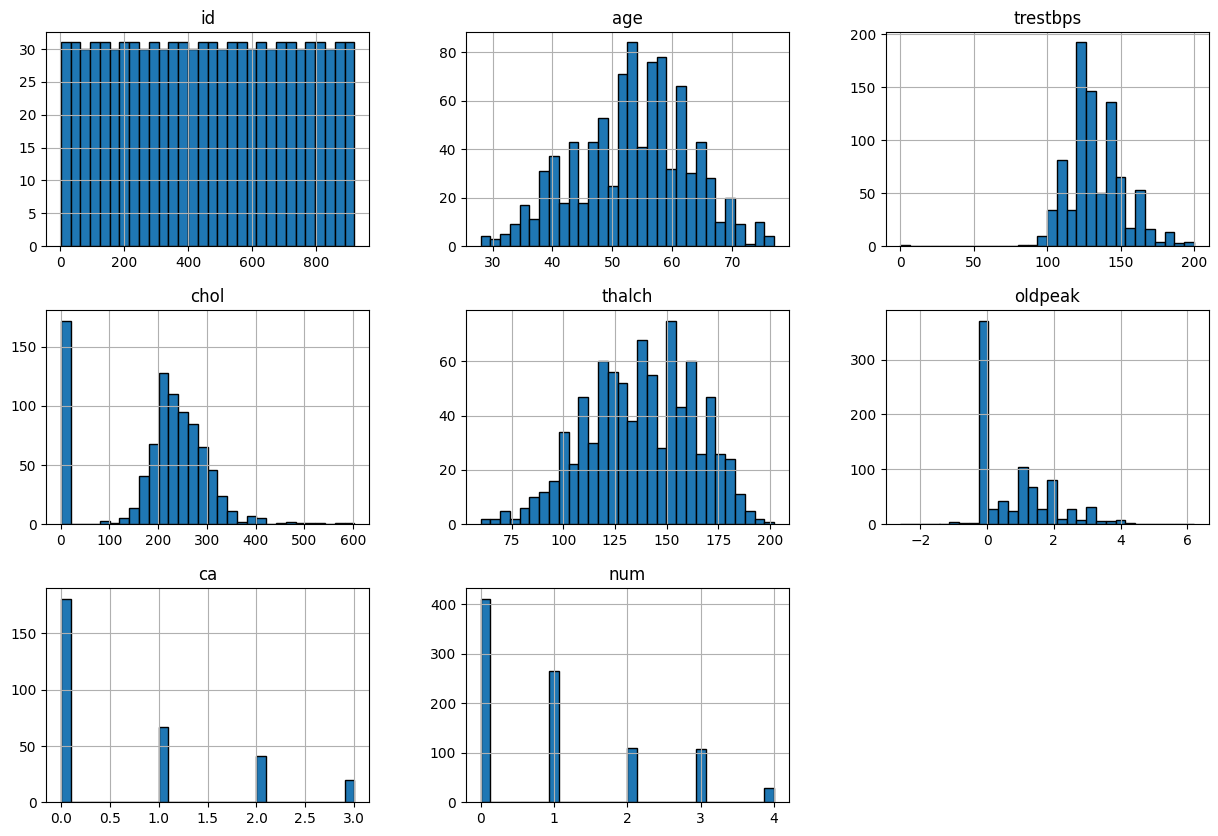

In [12]:
df.hist(figsize=(15,10), bins=30, edgecolor='black')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Missing Value**

In [20]:
df_clean = df.copy()

In [21]:
df_clean.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [23]:
nume = ["age", "trestbps", "chol", "thalch", "oldpeak"]

for col in nume:
    med_value = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(med_value)

In [24]:
cate = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "dataset"]

for col in cate:
    mode_value = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_value)

/tmp/ipython-input-981120436.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(mode_value)


In [25]:
df_clean.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


## **Data Duplikat**

In [26]:
df_clean.duplicated().sum()

np.int64(0)

## **Mengatasi Outlier**

In [27]:
Q1 = df_clean[nume].quantile(0.25)
Q3 = df_clean[nume].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (
    (df_clean[nume] < (Q1 - 1.5 * IQR)) |
    (df_clean[nume] > (Q3 + 1.5 * IQR))
)

outlier_condition.sum()

,0
age,0
trestbps,28
chol,185
thalch,2
oldpeak,16


In [28]:
for col in nume:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_clean[col] = np.clip(df_clean[col], lower, upper)

## **Encoding**

In [32]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["sex", "fbs", "exang", "dataset"]

le = LabelEncoder()

for col in label_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ["cp", "slope", "thal", "ca", "restecg"]

ordinal_encoder = OrdinalEncoder()

df_clean[ordinal_cols] = ordinal_encoder.fit_transform(df_clean[ordinal_cols])

## **Normalisasi / Standarisasi Fitur**

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_clean[nume] = scaler.fit_transform(
    df_clean[nume]
)

In [37]:
df_clean.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,1.007386,1,0,3.0,0.784914,0.283170,1,0.0,0.489901,0,1.424838,0.0,0.0,0.0,0
1,2,1.432034,1,0,0.0,1.671823,0.862529,0,0.0,-1.183228,1,0.642124,1.0,3.0,1.0,2
2,3,1.432034,1,0,0.0,-0.693267,0.239445,0,0.0,-0.346663,1,1.718356,1.0,2.0,2.0,1
3,4,-1.752828,1,0,2.0,-0.101995,0.469002,0,1.0,1.963848,0,2.598910,0.0,0.0,1.0,0
4,5,-1.328180,0,0,1.0,-0.101995,-0.033838,0,0.0,1.366302,0,0.544284,2.0,0.0,1.0,0


# **6. Simpan Data Hasil Preprocessing**

In [38]:
df_clean.to_csv(
    "heart_preprocessing/heart_clean.csv",
    index=False
)